In [15]:
# KNN IMPLEMENTATION

# Importing dependencies
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb 

In [16]:
# Training and testing data preperation
df = pd.read_csv("../Data/Dataset.csv")

In [39]:
# Define model, train and test
#featureList = df.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","winner_encoded","home_team_result"],axis=1).columns.values.tolist()
targets = df["home_team_result"]
features = df.drop(["winner_encoded","home_team_result",],axis=1)

featuresTrain, targetsTrain = features[0:47], targets[0:47]
featuresTest, targetsTest = features[47:], targets[47:]
featuresTrain, targetsTrain = features[0:47], targets[0:47]
featuresTest, targetsTest = features[47:], targets[47:]

#Training for KNN
k = 5
neigh = KNeighborsClassifier(n_neighbors = k,metric='manhattan').fit(featuresTrain, targetsTrain)
predictionTest = neigh.predict(featuresTest)
print("Accuracy of model at K =", k ,"is",metrics.accuracy_score(targetsTest, predictionTest))

# print(targetsTest)
# print(predictionTest) 

Accuracy of model at K = 5 is 0.7058823529411765


Minimum error:- 0.29411764705882354 at K = 5


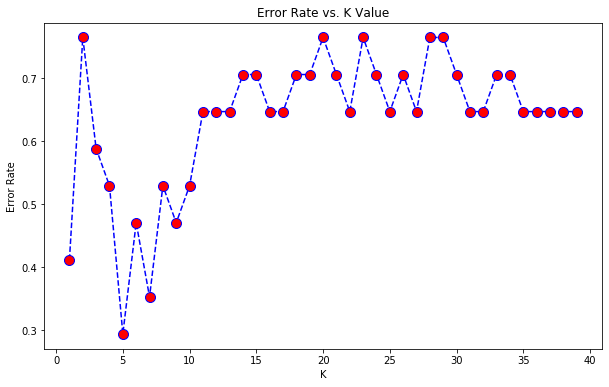

In [37]:
# Find optimal value for k
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
 knn.fit(featuresTrain,targetsTrain)
 predictionTest_i = knn.predict(featuresTest)
 error_rate.append(np.mean(predictionTest_i != targetsTest))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =", 1 + error_rate.index(min(error_rate)))

# Generate graphs